In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
columns_to_load = [
    'region_name', 'period_begin', 'period_end',
    'total_homes_sold', 'adjusted_average_homes_sold',
    'adjusted_average_new_listings', 'adjusted_pending_sales'
]

house_prices = pd.read_csv('weekly_housing_market_data_most_recent.tsv000', usecols=columns_to_load, delimiter='\t')
house_prices

,region_name,period_begin,period_end,total_homes_sold,adjusted_average_homes_sold,adjusted_average_new_listings,adjusted_pending_sales
0,"Jerauld County, SD",2017-08-21,2017-11-12,NaN,NaN,1.0,NaN
1,"Jerauld County, SD",2017-10-16,2017-11-12,NaN,NaN,NaN,NaN
2,"Bastrop County, TX",2017-11-06,2017-11-12,13.0,13.0,27.0,22.0
3,"Bastrop County, TX",2017-08-21,2017-11-12,199.0,16.0,20.0,12.0
4,"Bastrop County, TX",2017-10-16,2017-11-12,63.0,15.0,17.0,14.0
...,...,...,...,...,...,...,...
3151962,"Archer County, TX",2022-09-26,2022-10-23,5.0,1.0,3.0,1.0
3151963,"Irion County, TX",2022-10-17,2022-10-23,NaN,NaN,NaN,NaN
3151964,"Irion County, TX",2022-08-01,2022-10-23,3.0,1.0,NaN,1.0
3151965,"Irion County, TX",2022-09-26,2022-10-23,NaN,NaN,NaN,NaN


## Cleaning Dataset

In [7]:
# Remove rows with NaN values in these columns
house_prices_clean = house_prices.dropna()

house_prices_clean.reset_index(drop=True, inplace=True)

# Verify the cleanup
house_prices_clean

,region_name,period_begin,period_end,total_homes_sold,adjusted_average_homes_sold,adjusted_average_new_listings,adjusted_pending_sales
0,"Bastrop County, TX",2017-11-06,2017-11-12,13.0,13.0,27.0,22.0
1,"Bastrop County, TX",2017-08-21,2017-11-12,199.0,16.0,20.0,12.0
2,"Bastrop County, TX",2017-10-16,2017-11-12,63.0,15.0,17.0,14.0
3,"Hardy County, WV",2017-08-21,2017-11-12,16.0,2.0,2.0,2.0
4,"Hardy County, WV",2017-10-16,2017-11-12,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
2478020,"Wilmington, DE metro area",2022-02-07,2022-05-01,2221.0,185.0,227.0,184.0
2478021,"Wilmington, DE metro area",2022-04-04,2022-05-01,815.0,203.0,243.0,200.0
2478022,"Archer County, TX",2022-10-17,2022-10-23,2.0,2.0,2.0,2.0
2478023,"Archer County, TX",2022-08-01,2022-10-23,23.0,2.0,2.0,2.0


## Averaging over time period

In [30]:
house_prices_avg = house_prices_clean.groupby('region_name').mean(numeric_only=True)

house_prices_avg

,total_homes_sold,adjusted_average_homes_sold,adjusted_average_new_listings,adjusted_pending_sales
region_name,,,,
"Abbeville County, SC",12.649573,2.215812,2.414530,1.448718
"Aberdeen, SD metro area",33.192523,5.680374,6.099065,3.297196
"Aberdeen, WA metro area",157.858824,27.754446,32.394542,21.809070
"Abilene, TX metro area",271.471722,48.258355,55.723650,37.032134
"Acadia Parish, LA",28.520794,4.734405,6.015123,2.538752
...,...,...,...,...
"Yuma, AZ metro area",232.448501,41.108214,46.586701,27.539765
"Zanesville, OH metro area",93.272408,16.478032,19.253076,9.581722
"Zapata County, TX",5.515152,1.151515,1.121212,1.000000


In [31]:
house_prices_avg.reset_index(inplace=True)
print(house_prices_avg.columns)

Index(['region_name', 'total_homes_sold', 'adjusted_average_homes_sold',
       'adjusted_average_new_listings', 'adjusted_pending_sales'],
      dtype='object')


In [32]:
house_prices_avg.columns = ['Region', 'Total Homes Sold', 'Adjusted Average Homes Sold', 'Adjusted Average New Listings', 'Adjusted Pending Sales']

csv_file_path = 'house_prices_by_region.csv'  # Ensure the path is correct for your environment
house_prices_avg.to_csv(csv_file_path, index=False)

house_prices_avg

,Region,Total Homes Sold,Adjusted Average Homes Sold,Adjusted Average New Listings,Adjusted Pending Sales
0,"Abbeville County, SC",12.649573,2.215812,2.414530,1.448718
1,"Aberdeen, SD metro area",33.192523,5.680374,6.099065,3.297196
2,"Aberdeen, WA metro area",157.858824,27.754446,32.394542,21.809070
3,"Abilene, TX metro area",271.471722,48.258355,55.723650,37.032134
4,"Acadia Parish, LA",28.520794,4.734405,6.015123,2.538752
...,...,...,...,...,...
3843,"Yuma, AZ metro area",232.448501,41.108214,46.586701,27.539765
3844,"Zanesville, OH metro area",93.272408,16.478032,19.253076,9.581722
3845,"Zapata County, TX",5.515152,1.151515,1.121212,1.000000
3846,"Zapata, TX metro area",5.000000,1.111111,1.074074,1.000000


In [10]:
state_abbr_map = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [22]:
def extract_state_abbreviation(region_name, state_abbr_map):
    # Trying to find direct match for abbreviation
    for abbr in state_abbr_map.values():
        if f", {abbr}" in region_name:  # making sure abbreviation not a part of another word
            return abbr
    
    # If no abbreviation match found, try to match the full state name
    for state, abbr in state_abbr_map.items():
        if state in region_name:
            return abbr
            
    # No state identified
    return None

# Apply the function to create a new 'state' column
house_prices_clean.loc[:, 'state'] = house_prices_clean['region_name'].apply(lambda x: extract_state_abbreviation(x, state_abbr_map))

# Group by the 'state' column and calculate the mean for numeric columns
house_prices_grouped = house_prices_clean.groupby('state').agg({
    'total_homes_sold': 'mean',
    'adjusted_average_homes_sold': 'mean',
    'adjusted_average_new_listings': 'mean',
    'adjusted_pending_sales': 'mean'
}).reset_index()

house_prices_grouped.columns = [
    'State', 
    'Total Homes Sold', 
    'Adjusted Average Homes Sold', 
    'Adjusted Average New Listings', 
    'Adjusted Pending Sales'
]

house_prices_grouped

/tmp/ipykernel_168/2204925528.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_clean.loc[:, 'state'] = house_prices_clean['region_name'].apply(lambda x: extract_state_abbreviation(x, state_abbr_map))


,State,Total Homes Sold,Adjusted Average Homes Sold,Adjusted Average New Listings,Adjusted Pending Sales
0,AK,287.541059,50.978444,62.493596,35.979387
1,AL,191.081433,33.849442,35.440730,20.136003
2,AR,102.111147,18.048895,20.010722,12.584891
3,AZ,1362.660837,242.484625,269.004011,190.830365
4,CA,914.266376,162.816600,188.150745,132.069873
5,CO,289.864085,51.565790,57.551616,42.583446
6,CT,798.096977,142.204971,172.212534,95.820584
7,DE,650.021277,115.700215,131.362897,86.394693
8,FL,977.746535,174.400143,207.661572,123.671110
9,GA,101.861066,17.968301,20.505561,11.416835


In [25]:
csv_file_path = 'house_prices_grouped.csv' 
house_prices_grouped.to_csv(csv_file_path, index=False)

In [7]:
employment = pd.read_csv('employment.csv')
house_prices_state = pd.read_csv('house_prices_state.csv')
house_prices_region = pd.read_csv('house_prices_region.csv')

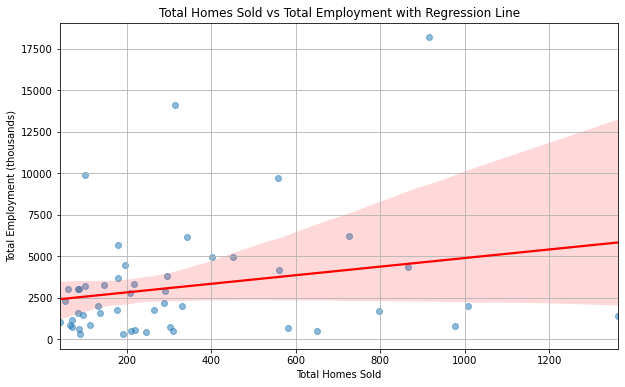

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_states_housing = house_prices_state['State'].unique()
unique_states_employment = employment['State'].unique()

state_mapping = {abbr: name for abbr, name in zip(unique_states_housing, unique_states_employment)}

house_prices_state['State'] = house_prices_state['State'].map(state_mapping)

# merging dataframes
merged_df = pd.merge(house_prices_state, employment, how='inner', on='State')

# Re-plotting with seaborn for a smoother regression line and potentially better handling of outliers
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Homes Sold', y='Total employment (thousands)', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Total Homes Sold vs Total Employment with Regression Line')
plt.xlabel('Total Homes Sold')
plt.ylabel('Total Employment (thousands)')
plt.grid(True)
plt.show()